In [ ]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt

In [35]:
LR = 0.00002
DF = 1

def update_rule(r, v_w, v_xs, v_nxs):
    return v_w + np.dot(LR*(r + DF * np.dot(v_w.transpose(), v_nxs) - np.dot(v_w.transpose(), v_xs)), v_xs)

In [42]:
LR = 0.00002
DF = 1

def update_rule(r, v_w, v_xs, v_nxs):
    return v_w + np.dot(LR*(r + DF * np.dot(v_w.transpose(), v_nxs) - np.dot(v_w.transpose(), v_xs)), v_xs)

def random_walk(curr_state):
    states_walked = randint(-100,100)
    next_state = curr_state + states_walked
    v_xs = np.zeros(10)
    
    if next_state >= 1000:
        v_xs[9] = 1
        return 1, next_state, v_xs

    if next_state <= 0:
        v_xs[0] = 1
        return -1, next_state, v_xs

    v_xs[next_state//100] = 1
    return 0, next_state, v_xs

v_w = np.zeros(10)

for i in range(100000):
    curr_state = 500
    v_xs = np.zeros(10)
    v_xs[curr_state//100] = 1

    while curr_state > 0 and curr_state < 1000:
        reward, next_state, v_nxs = random_walk(curr_state)
        v_w = update_rule(reward, v_w, v_xs, v_nxs)
        v_xs = v_nxs
        curr_state = next_state 
    if i%20000==0:
        print(f"i:{i}, v_w:{v_w}")

i:0, v_w:[0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 2.e-05]
i:20000, v_w:[-0.17788098 -0.03328291 -0.00678216 -0.00141655 -0.0002531   0.00021347
  0.00133748  0.0065555   0.03294699  0.1757891 ]
i:40000, v_w:[-0.32334883 -0.09824387 -0.0320429  -0.01062938 -0.00264968  0.00223437
  0.01034405  0.0316818   0.09716843  0.3215808 ]
i:60000, v_w:[-0.44975222 -0.17264233 -0.0707541  -0.02843161 -0.00828195  0.00653397
  0.02775441  0.06957744  0.17086863  0.44964857]
i:80000, v_w:[-0.56726522 -0.24766918 -0.11583813 -0.05253004 -0.01632675  0.01243789
  0.05037588  0.11514437  0.24770765  0.56323094]


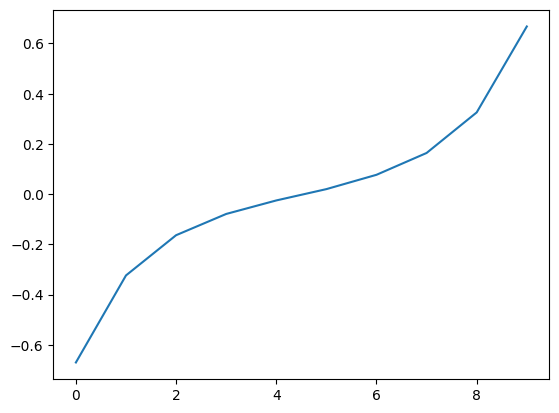

In [41]:
plt.plot(v_w)